## Imports

In [1]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Data Summary

In [2]:
df = pd.read_csv('../Data/combined_data_cleaned.csv')

In [3]:
df.head(2)

,category,description,title,also_buy,brand,rank,main_cat,asin,details,overall,verified,reviewerID,reviewText,summary
0,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",['Lipton Yellow Label Tea use only the finest ...,Lipton Yellow Label Tea (loose tea) - 450g,"['B00886E4K0', 'B00CREXSHY', 'B001QTRGAQ', 'B0...",Lipton,"30,937 in Grocery & Gourmet Food (",Grocery,4639725043,NaN,5.0,True,A1J205ZK25TZ6W,I make the best brewed iced tea with this yell...,Best for brewed iced tea.
1,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",['Lipton Yellow Label Tea use only the finest ...,Lipton Yellow Label Tea (loose tea) - 450g,"['B00886E4K0', 'B00CREXSHY', 'B001QTRGAQ', 'B0...",Lipton,"30,937 in Grocery & Gourmet Food (",Grocery,4639725043,NaN,3.0,True,ACOICLIJQYECU,I have recently started drinking hot tea again...,Not Bad for iced Tea


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086548 entries, 0 to 1086547
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   category     1086548 non-null  object 
 1   description  993137 non-null   object 
 2   title        1086548 non-null  object 
 3   also_buy     929733 non-null   object 
 4   brand        1078563 non-null  object 
 5   rank         1042485 non-null  object 
 6   main_cat     1085923 non-null  object 
 7   asin         1086548 non-null  object 
 8   details      1086497 non-null  object 
 9   overall      1086548 non-null  float64
 10  verified     1086548 non-null  bool   
 11  reviewerID   1086548 non-null  object 
 12  reviewText   1086175 non-null  object 
 13  summary      1086335 non-null  object 
dtypes: bool(1), float64(1), object(12)
memory usage: 108.8+ MB


### Explore Data

#### Numeric Data

In [5]:
# Only one of the features is numeric
df.overall.describe()

count    1.086548e+06
mean     4.439878e+00
std      1.065040e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

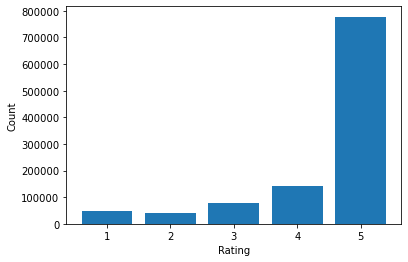

In [6]:
labels, counts = np.unique(df.overall, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### Boolean Data

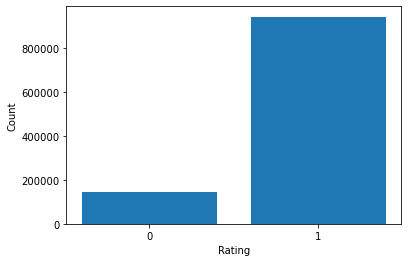

In [9]:
labels, counts = np.unique(df.verified, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xticks([0, 1])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### Analyze Categories/Objects

In [8]:
df_objects = df.select_dtypes(include='object')
dfo_unique = pd.DataFrame(df_objects.nunique()).reset_index()
dfo_unique.columns = ['Features', 'Number of Categories']
dfo_unique.sort_values(by='Number of Categories', ascending=False)
dfo_unique

,Features,Number of Categories
0,category,1107
1,description,36532
2,title,40969
3,also_buy,29115
4,brand,8861
5,rank,36865
6,main_cat,19
7,asin,41280
8,details,40178
9,reviewerID,127496


Except for the main_cat, there are too many unique categories for several traditional types of exploratory data analysis to be helpful.
For example, one hot encoding using pd.get_dummies(df) runs into memory errors even when the biggest features are dropped from the analysis.
Therefore, in later notebooks will use options created specifically for recommendation systems. 